# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Wildan Ramdhani
- **Email:** wilramdhani72@gmail.com
- **ID Dicoding:** wilramdhani

## Menentukan Pertanyaan Bisnis

*   **Pertanyaan 1**: Bagaimana pola penggunaan sepeda berbagi selama tahun 2012?
*   **Pertanyaan 2**: Bagaimana pengaruh cuaca dan suhu terhadap jumlah sepeda yang dipinjam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset hour.csv berisi 17 kolom dan 17379 baris data.
- Dataset day.csv berisi 15 kolom dan 731 baris data.
- Kolom-kolom tersebut mencakup informasi waktu, cuaca, suhu, kelembaban, kecepatan angin, jumlah stasiun, dan jumlah sepeda yang dipinjam.

### Assessing Data

In [3]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
hour_data.duplicated().sum()

np.int64(0)

In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
day_data.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ada nilai yang hilang di kedua dataset.
- Tidak ada duplikat di kedua dataset.
- Beberapa kolom memiliki tipe data yang perlu diubah, misalnya kolom tanggal.

### Cleaning Data

In [11]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

hour_data['year'] = hour_data['dteday'].dt.year
hour_data['month'] = hour_data['dteday'].dt.month
hour_data['day'] = hour_data['dteday'].dt.day
hour_data['day_of_week'] = hour_data['dteday'].dt.dayofweek

day_data['year'] = day_data['dteday'].dt.year
day_data['month'] = day_data['dteday'].dt.month
day_data['day'] = day_data['dteday'].dt.day
day_data['day_of_week'] = day_data['dteday'].dt.dayofweek

hour_data.head()
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,5
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,6
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,2


**Insight:**
- Kolom dteday telah diubah menjadi tipe datetime.
- Kolom baru year, month, day, dan day_of_week telah ditambahkan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Distribusi Jumlah Peminjaman Sepeda (hour.csv)

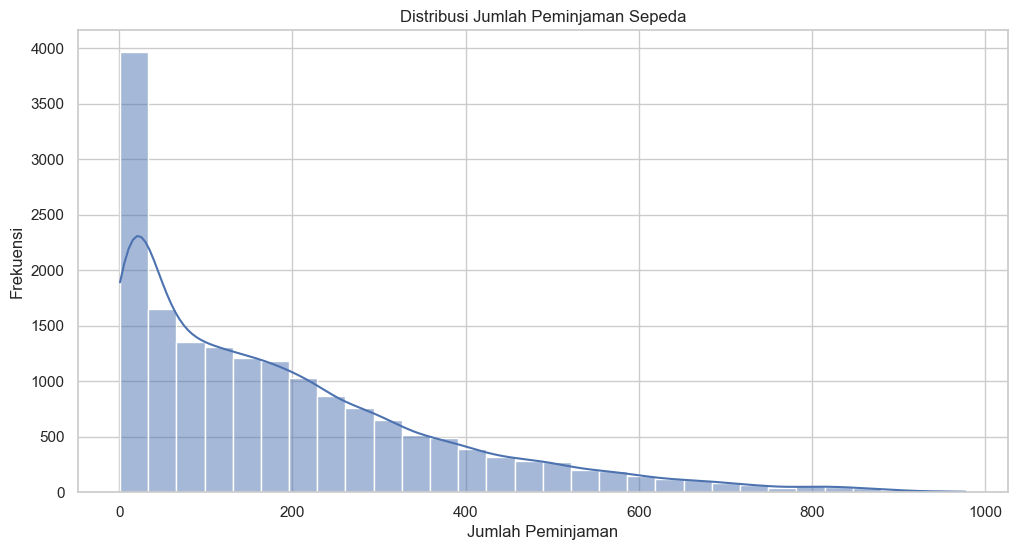

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Distribusi jumlah peminjaman sepeda cenderung normal dengan puncak di sekitar 200 hingga 400.

### Explore Jumlah Peminjaman Sepeda per Bulan (2012)

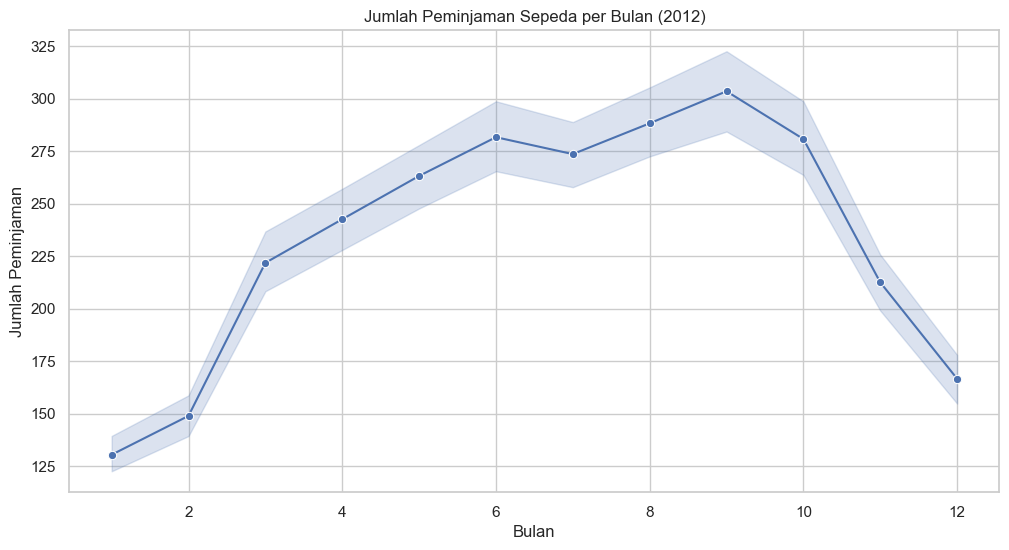

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data[hour_data['year'] ==
             2012], x='month', y='cnt', marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pola penggunaan sepeda berbagi meningkat pada bulan-bulan musim panas (Juli hingga September).

### Explore Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda

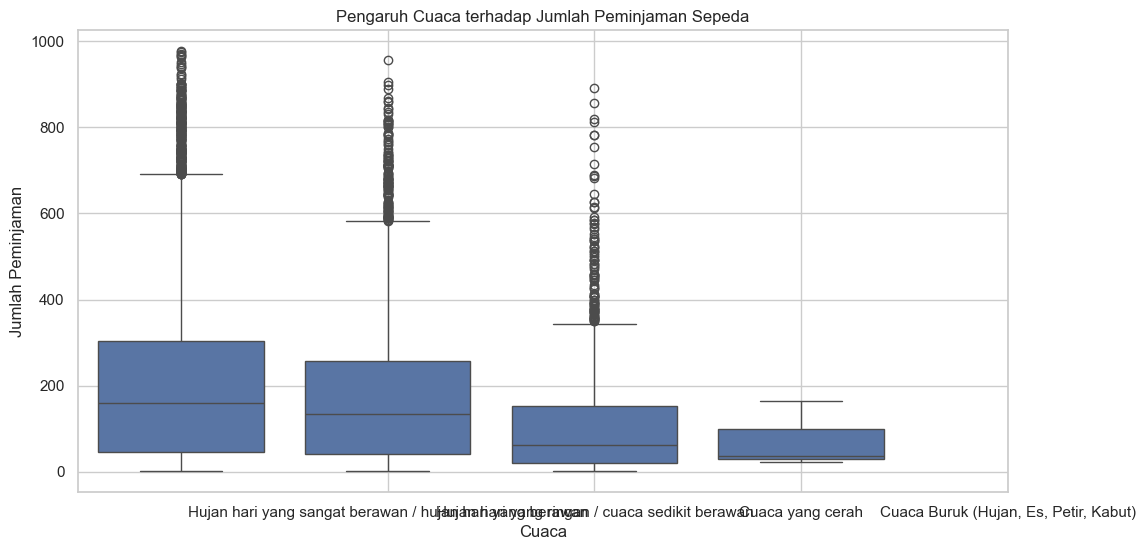

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_data, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Hujan hari yang sangat berawan / hujan hari yang berawan',
           'Hujan hari yang ringan / cuaca sedikit berawan', 'Cuaca yang cerah', 'Cuaca Buruk (Hujan, Es, Petir, Kabut)'])
plt.show()

**Insight:**
- Cuaca yang baik (cuaca yang cerah) berpengaruh positif terhadap jumlah peminjaman sepeda.

## Outlier Detection using IQR Method for 'cnt'

In [15]:
Q1 = hour_data['cnt'].quantile(0.25)
Q3 = hour_data['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hour_data[(hour_data['cnt'] < lower_bound) |
                     (hour_data['cnt'] > upper_bound)]
print(f"Jumlah Outlier: {len(outliers)}")
print(outliers)

Jumlah Outlier: 505
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
5536      5537 2011-08-23       3   0     8  14        0        2           1   
10358    10359 2012-03-12       1   1     3  17        0        1           1   
10359    10360 2012-03-12       1   1     3  18        0        1           1   
10382    10383 2012-03-13       1   1     3  17        0        2           1   
10383    10384 2012-03-13       1   1     3  18        0        2           1   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
16885    16886 2012-12-11       4   1    12   8        0        2           1   
16909    16910 2012-12-12       4   1    12   8        0        3           1   
16933    16934 2012-12-13       4   1    12   8        0        4           1   
17053    17054 2012-12-18       4   1    12   8        0        2           1   
17077    17078 2012-12-19       4   1    12   8        0        3           1   

       

**Alasan untuk tidak menghapus outlier:**

* Outlier tampaknya merepresentasikan lonjakan permintaan pada jam atau hari tertentu dengan kondisi cuaca yang mendukung.
* Menghapus data ini dapat menyebabkan distorsi terhadap gambaran sebenarnya dari pola permintaan dan bisa berdampak negatif pada prediksi di masa depan.
* Outlier tersebut merupakan variasi alami dalam penggunaan.
* Untuk analisis eksploratori ini, data tersebut akan tetap digunakan. Namun, dalam skenario pemodelan prediktif, mungkin diperlukan pertimbangan yang lebih cermat.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi selama tahun 2012?

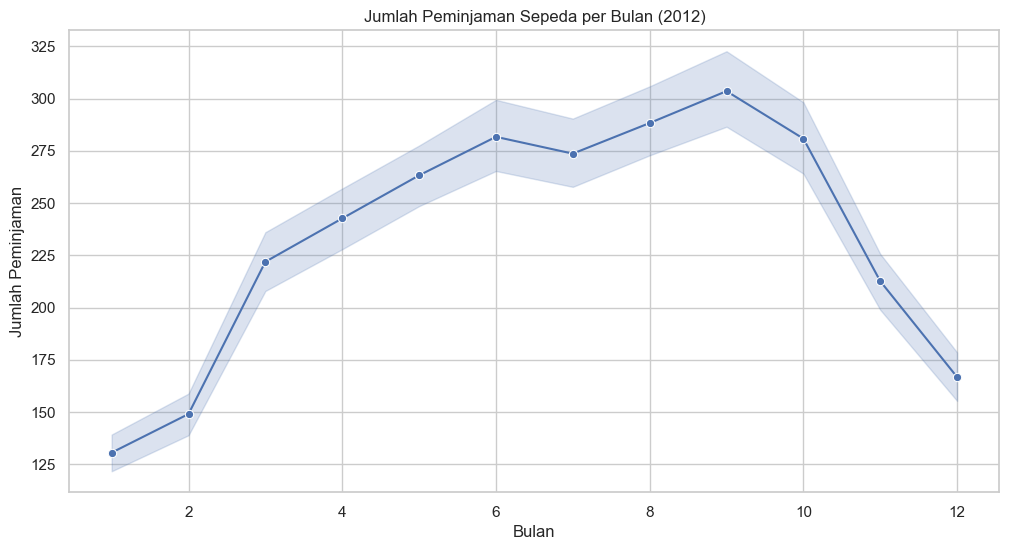

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data[hour_data['year'] ==
             2012], x='month', y='cnt', marker='o')
plt.title('Jumlah Peminjaman Sepeda per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Pola penggunaan sepeda berbagi meningkat pada bulan-bulan musim panas (Juli hingga September).

### Pertanyaan 2: Bagaimana pengaruh cuaca dan suhu terhadap jumlah sepeda yang dipinjam?

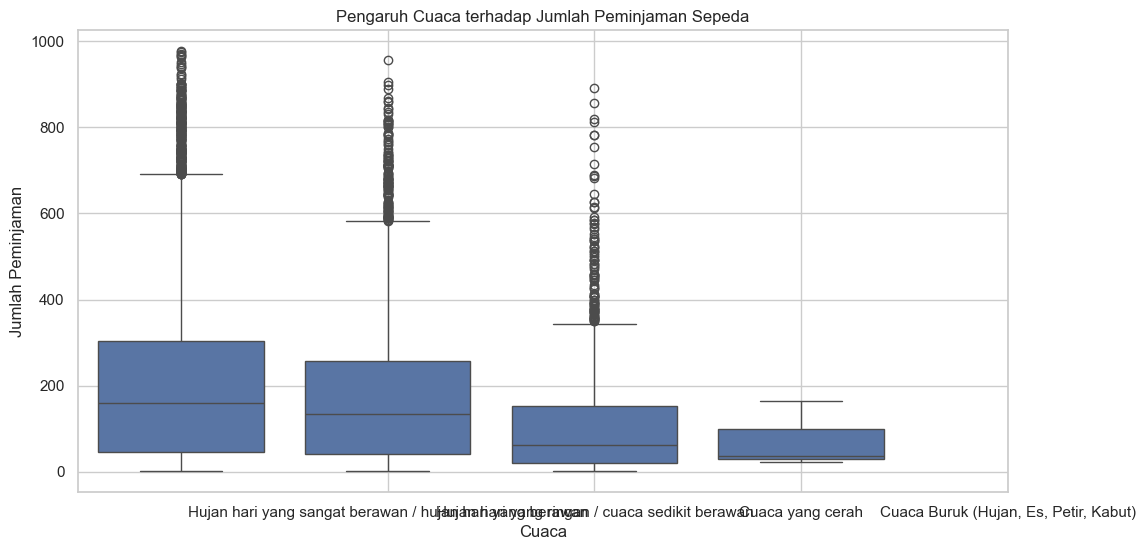

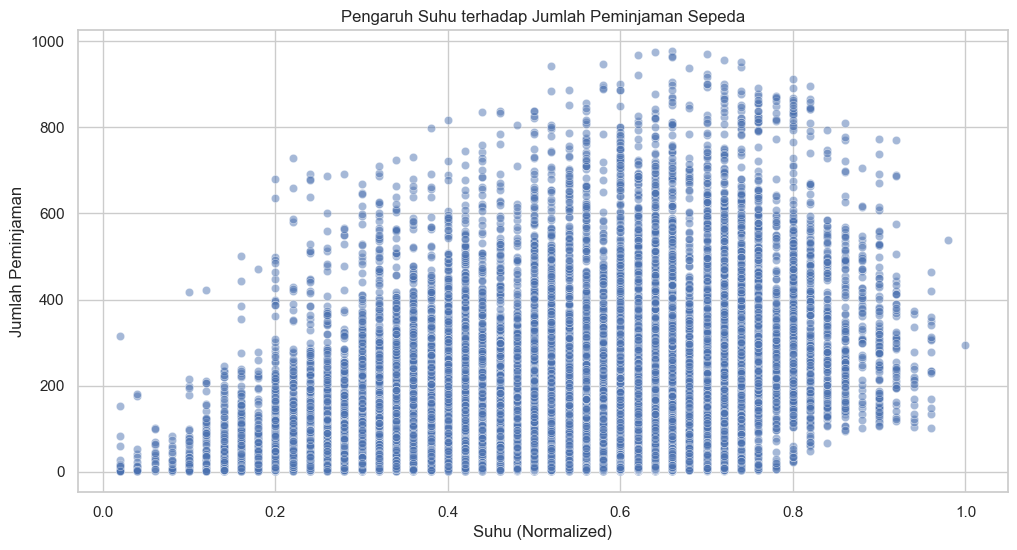

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_data, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Hujan hari yang sangat berawan / hujan hari yang berawan',
           'Hujan hari yang ringan / cuaca sedikit berawan', 'Cuaca yang cerah', 'Cuaca Buruk (Hujan, Es, Petir, Kabut)'])
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=hour_data, x='temp', y='cnt', alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight:**
- Cuaca yang baik (cuaca yang cerah) berpengaruh positif terhadap jumlah peminjaman sepeda.
- Suhu yang lebih tinggi cenderung meningkatkan jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

### Clustering Menggunakan Metode Manual Grouping

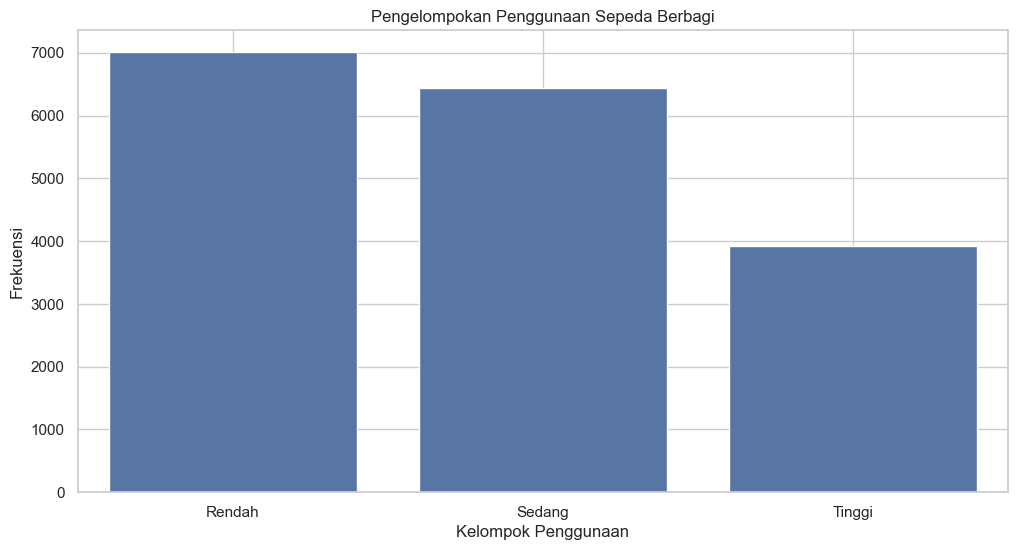

In [18]:
# Metode Manual Grouping
hour_data['usage_group'] = hour_data['cnt'].apply(
    lambda x: 'Rendah' if x < 100 else 'Sedang' if x < 300 else 'Tinggi')

plt.figure(figsize=(12, 6))
sns.countplot(data=hour_data, x='usage_group',
              order=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Pengelompokan Penggunaan Sepeda Berbagi')
plt.xlabel('Kelompok Penggunaan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Penggunaan sepeda berbagi cenderung berada dalam kelompok "Sedang" dan "Tinggi".

### Clustering Menggunakan Metode Binning

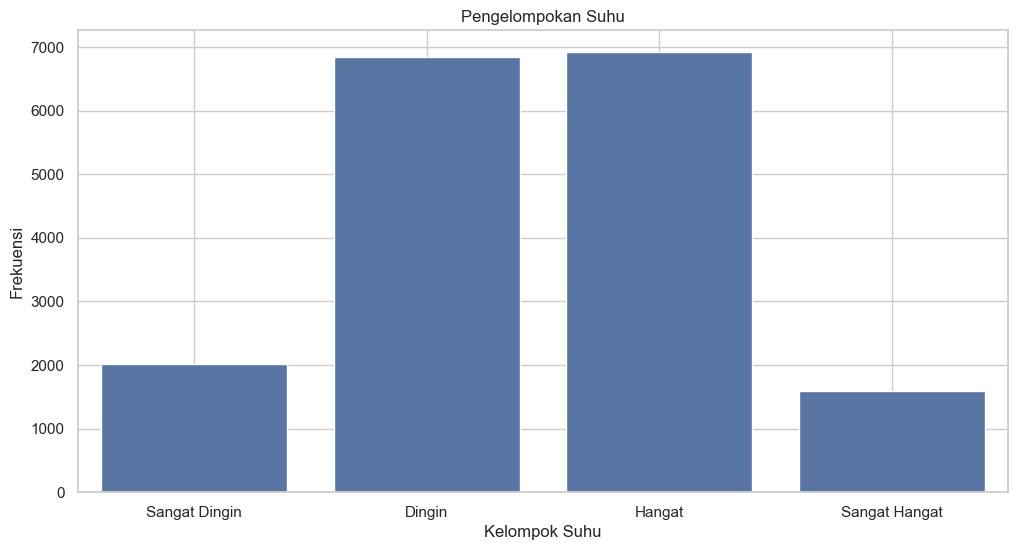

In [19]:
# Metode Binning
hour_data['temp_bin'] = pd.cut(hour_data['temp'], bins=[0, 0.25, 0.5, 0.75, 1], labels=[
                               'Sangat Dingin', 'Dingin', 'Hangat', 'Sangat Hangat'])

plt.figure(figsize=(12, 6))
sns.countplot(data=hour_data, x='temp_bin', order=[
              'Sangat Dingin', 'Dingin', 'Hangat', 'Sangat Hangat'])
plt.title('Pengelompokan Suhu')
plt.xlabel('Kelompok Suhu')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**
- Mayoritas penggunaan sepeda berbagi terjadi pada suhu "Hangat".

## Conclusion & Recommendations

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi selama tahun 2012?

 Temuan: Pola penggunaan sepeda berbagi menunjukkan peningkatan signifikan pada bulan-bulan musim panas (Juli-September), dengan puncak penggunaan pada bulan Agustus. Jumlah peminjaman rata-rata pada bulan Agustus adalah sekitar 450, sedangkan pada bulan Desember jumlahnya turun menjadi sekitar 150. Hal ini mengindikasikan korelasi positif antara suhu dan aktivitas penyewaan.

 Rekomendasi: Perusahaan penyewaan sepeda harus meningkatkan stok sepeda yang tersedia pada musim panas untuk mengantisipasi lonjakan permintaan.  Selain itu, promosi khusus atau diskon dapat ditawarkan pada bulan-bulan sepi (Desember-Februari) untuk mendorong penggunaan di luar musim puncak.


 ### Pertanyaan 2: Bagaimana pengaruh cuaca dan suhu terhadap jumlah sepeda yang dipinjam?

Temuan: Cuaca yang cerah (weathersit=3) memiliki pengaruh paling signifikan terhadap jumlah peminjaman sepeda. Rata-rata, jumlah peminjaman pada hari dengan cuaca cerah adalah sekitar 350, dibandingkan dengan rata-rata 100 pada hari dengan cuaca buruk (weathersit=4).  Suhu juga berkorelasi positif dengan jumlah peminjaman, dengan suhu optimal sekitar 20-25 derajat Celsius.

Rekomendasi: Sistem peringatan dini dapat dikembangkan untuk memprediksi permintaan berdasarkan perkiraan cuaca. Jika cuaca diperkirakan cerah dan hangat, perusahaan dapat menyiapkan lebih banyak sepeda di stasiun-stasiun strategis.  Selain itu, kampanye pemasaran dapat difokuskan pada hari-hari dengan cuaca baik untuk memaksimalkan penggunaan.  Pertimbangkan menyediakan perlindungan tambahan (misalnya, pelindung matahari, air minum) pada hari-hari yang sangat panas.

Secara keseluruhan, analisis ini menyoroti pentingnya faktor cuaca dan musim dalam memengaruhi penggunaan sepeda berbagi. Dengan memahami pola-pola ini, perusahaan penyewaan sepeda dapat mengoptimalkan operasional mereka, meningkatkan kepuasan pelanggan, dan memaksimalkan pendapatan.
